In [17]:
from modules.data import data_reader
import pandas as pd
import numpy as np
import os

In [3]:
#evaluation = data_reader.read_data(match=["stock"], location="evaluation")
#prediction = data_reader.read_data(match=["stock"], location="prediction")

In [26]:
def save_dataframe_to_csv(dataframe: pd.DataFrame, file_path: str):
    """
    Saves a pandas DataFrame to a CSV file at the specified location.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to save.
    file_path (str): The location where the CSV file will be saved.

    Returns:
    None
    """
    try:
        dataframe.to_csv(file_path, index=True)
        print(f"DataFrame saved successfully to {file_path}")
    except Exception as e:
        print(f"An error occurred while saving the DataFrame: {e}")

# Data aggregation

In [18]:
# path to evaluation directory
project_folder = os.getcwd()
directory = os.path.abspath(os.path.join(project_folder, "results", "evaluation"))
aggregated_results_directory = os.path.abspath(os.path.join(project_folder, "results", "aggregated_results"))

In [19]:
# Initialize an empty DataFrame to store the aggregated results
aggregated_evaluation = pd.DataFrame()
aggregated_ranking = pd.DataFrame()

In [20]:
# List all files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.csv')]

In [21]:
# Process each file and add to aggregated evaluation

higher_better = ['r2', 'mda']
lower_better = ['mse', 'mae', 'rmse', 'mape']

for file in files:
    # Extract parameters from the file name
    base_name = os.path.splitext(file)[0]
    parameters = base_name.split('_')
    param_dict = {}
    for param in parameters:
        key, value = param.split('=')
        param_dict[key] = value

    # Read the CSV file into a DataFrame
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df.rename(columns={"Unnamed: 0" : "model"}, inplace=True)

    
    

    # Add parameter columns to the DataFrame
    for key, value in param_dict.items():
        df[key] = value

    # creating the ranking df
    ranked_df = df.copy()
    ranked_df['model'] = df['model']

    # Rank the models for each metric and add to the new DataFrame
    for metric in higher_better:
        ranked_df[metric] = df[metric].rank(ascending=False, method='min').astype(int)

    for metric in lower_better:
        ranked_df[metric] = df[metric].rank(ascending=True, method='min').astype(int)

    # Append the DataFrame to the aggregated DataFrame
    aggregated_evaluation = pd.concat([aggregated_evaluation, df], ignore_index=True)
    aggregated_ranking = pd.concat([aggregated_ranking, ranked_df], ignore_index=True)


In [22]:
aggregated_ranking

,model,r2,mse,mae,rmse,mda,mape,T,FR,TOD,FO,CLTS,SD,ED,FTL,FTF,FTG,TSCVR,BS,ME
0,arima,4,4,3,4,2,3,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
1,autoregressor,2,2,1,2,2,1,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
2,prophet,7,7,7,7,1,7,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
3,lag_llama,5,5,6,5,6,5,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
4,ft_lag_llama,6,6,5,6,7,6,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,prophet,3,3,2,3,1,2,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
539,lag_llama,7,7,7,7,3,6,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
540,ft_lag_llama,1,1,1,1,2,1,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
541,timeGPT,2,2,3,2,4,3,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4


In [23]:
aggregated_evaluation

,model,r2,mse,mae,rmse,mda,mape,T,FR,TOD,FO,CLTS,SD,ED,FTL,FTF,FTG,TSCVR,BS,ME
0,arima,-0.005329,33.700828,3.143311,5.805241,0.586207,0.032246,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
1,autoregressor,0.440702,18.748907,2.427333,4.330001,0.586207,0.024435,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
2,prophet,-1.655517,89.018790,6.049526,9.434977,0.620690,0.064357,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
3,lag_llama,-0.449953,48.605622,5.508950,6.971773,0.413793,0.057188,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
4,ft_lag_llama,-0.494554,50.100735,5.499569,7.078187,0.379310,0.057786,Aggregate,daily,cc,5,128,2022-01-01,2024-01-01,200,5,0,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,prophet,-0.114293,0.001702,0.034048,0.041249,0.586207,3.648994,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
539,lag_llama,-0.479615,0.002259,0.038999,0.047533,0.517241,8.613169,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
540,ft_lag_llama,-0.006867,0.001537,0.032072,0.039211,0.551724,1.000000,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4
541,timeGPT,-0.095983,0.001674,0.035427,0.040909,0.448276,5.393663,WTI,weekly,commodity,5,64,2019-01-01,2024-01-01,200,5,0,6,5,4


In [25]:
# runs linear regression on the aggregated results and prints out coefficients

import statsmodels.api as sm

metric = "mda"
group = ["model", "FR"]

def perform_linear_regression(df, target_col, explanatory_cols):
    # Extract the target variable
    y = df[target_col]
    
    if len(explanatory_cols) == 2:
        X = df[explanatory_cols[0]] + "_" + df[explanatory_cols[1]]
    else:
        X = df[explanatory_cols]

    
    # One-hot encode categorical variables
    X = pd.get_dummies(X, drop_first=True).astype(int)
    
    # Adding a constant term for the intercept
    X = sm.add_constant(X)
    
    # Performing the linear regression
    model = sm.OLS(y, X).fit()
    
    # Printing the regression coefficients
    print("Regression Coefficients:")
    print(model.params)

perform_linear_regression(aggregated_evaluation, metric, group)

Regression Coefficients:
const                     0.130268
arima_minutely            0.030651
autoregressor_daily       0.180077
autoregressor_minutely    0.199234
ft_lag_llama_daily        0.245211
ft_lag_llama_minutely     0.333333
lag_llama_daily           0.340996
lag_llama_minutely        0.298851
prophet_daily             0.363985
prophet_minutely          0.394636
timeGPT_daily             0.325670
timeGPT_minutely          0.318008
dtype: float64


# Average metrics across all experiments

In [24]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model"]
group = ["model"]
model_ranking = aggregated_ranking[metrics].groupby(group).mean()
model_ranking

,r2,mse,mae,rmse,mda,mape
model,,,,,,
arima,2.858974,2.858974,2.756410,2.858974,5.410256,2.294872
autoregressor,4.884615,4.884615,4.602564,4.884615,3.782051,4.653846
ft_lag_llama,4.115385,4.115385,4.153846,4.115385,2.730769,4.102564
ft_timeGPT,3.426667,3.426667,3.253333,3.426667,3.373333,3.386667
lag_llama,4.564103,4.564103,4.833333,4.564103,3.487179,4.782051
prophet,4.769231,4.769231,4.833333,4.769231,3.256410,5.025641
timeGPT,3.243590,3.243590,3.423077,3.243590,3.743590,3.615385


In [27]:
save_dataframe_to_csv(model_ranking, os.path.join(aggregated_results_directory, "model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\model_ranking.csv


# Metrics across type of data and model

In [25]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "TOD"]
group = ["TOD", "model"]
tod_model_ranking = aggregated_ranking[metrics].groupby(group).mean()
tod_model_ranking

r2       mse       mae      rmse       mda  \
TOD       model                                                             
cc        arima          3.400000  3.400000  3.266667  3.400000  3.466667   
          autoregressor  2.600000  2.600000  1.933333  2.600000  3.533333   
          ft_lag_llama   6.233333  6.233333  6.400000  6.233333  3.500000   
          ft_timeGPT     2.666667  2.666667  2.600000  2.666667  3.800000   
          lag_llama      5.300000  5.300000  5.700000  5.300000  4.400000   
          prophet        5.466667  5.466667  5.533333  5.466667  3.733333   
          timeGPT        2.333333  2.333333  2.566667  2.333333  3.066667   
commodity arima          4.000000  4.000000  3.500000  4.000000  6.166667   
          autoregressor  5.833333  5.833333  6.000000  5.833333  1.833333   
          ft_lag_llama   3.666667  3.666667  3.500000  3.666667  3.166667   
          ft_timeGPT     4.000000  4.000000  3.666667  4.000000  5.500000   
          lag_llama      4.500000  4.500000  4.500000  4.500000  3.500000   
          prophet        3.833333  3.833333  4.333333  3.833333  3.000000   
          timeGPT        2.166667  2.166667  2.500000  2.166667  2.666667   
fx        arima          3.166667  3.166667  2.500000  3.166667  7.000000   
          autoregressor  6.500000  6.500000  6.166667  6.500000  3.333333   
          ft_lag_llama   3.333333  3.333333  2.333333  3.333333  1.333333   
          ft_timeGPT     2.833333  2.833333  3.166667  2.833333  2.333333   
          lag_llama      5.500000  5.500000  6.166667  5.500000  3.833333   
          prophet        2.833333  2.833333  3.833333  2.833333  3.000000   
          timeGPT        3.833333  3.833333  3.833333  3.833333  4.833333   
index     arima          2.166667  2.166667  2.250000  2.166667  6.638889   
          autoregressor  6.361111  6.361111  6.333333  6.361111  4.388889   
          ft_lag_llama   2.555556  2.555556  2.694444  2.555556  2.250000   
          ft_timeGPT     4.121212  4.121212  3.787879  4.121212  2.787879   
          lag_llama      3.805556  3.805556  3.944444  3.805556  2.666667   
          prophet        4.666667  4.666667  4.500000  4.666667  2.944444   
          timeGPT        4.083333  4.083333  4.222222  4.083333  4.305556   

                             mape  
TOD       model                    
cc        arima          3.266667  
          autoregressor  1.900000  
          ft_lag_llama   6.500000  
          ft_timeGPT     2.600000  
          lag_llama      5.666667  
          prophet        5.533333  
          timeGPT        2.533333  
commodity arima          3.000000  
          autoregressor  6.833333  
          ft_lag_llama   2.500000  
          ft_timeGPT     4.333333  
          lag_llama      3.833333  
          prophet        5.000000  
          timeGPT        2.500000  
fx        arima          1.666667  
          autoregressor  6.333333  
          ft_lag_llama   1.333333  
          ft_timeGPT     4.333333  
          lag_llama      5.500000  
          prophet        4.666667  
          timeGPT        4.166667  
index     arima          1.472222  
          autoregressor  6.305556  
          ft_lag_llama   2.833333  
          ft_timeGPT     3.757576  
          lag_llama      4.083333  
          prophet        4.666667  
          timeGPT        4.611111

In [30]:
save_dataframe_to_csv(tod_model_ranking, os.path.join(aggregated_results_directory, "TOD_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\TOD_model_ranking.csv


# Metrics across Context length and model

In [26]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "CLTS"]
group = ["CLTS", "model"]
clts_model_ranking = aggregated_ranking[metrics].groupby(group).mean()

clts_model_ranking

r2       mse       mae      rmse       mda      mape
CLTS model                                                                    
128  arima          2.807692  2.807692  2.846154  2.807692  5.192308  2.269231
     autoregressor  4.884615  4.884615  4.653846  4.884615  3.923077  4.730769
     ft_lag_llama   4.192308  4.192308  3.923077  4.192308  2.538462  3.961538
     ft_timeGPT     3.600000  3.600000  3.320000  3.600000  3.560000  3.440000
     lag_llama      4.461538  4.461538  4.846154  4.461538  3.230769  4.730769
     prophet        4.538462  4.538462  4.730769  4.538462  3.500000  5.115385
     timeGPT        3.384615  3.384615  3.538462  3.384615  3.961538  3.615385
32   arima          2.961538  2.961538  2.884615  2.961538  5.500000  2.461538
     autoregressor  4.884615  4.884615  4.500000  4.884615  3.461538  4.538462
     ft_lag_llama   4.000000  4.000000  3.961538  4.000000  3.038462  4.076923
     ft_timeGPT     3.240000  3.240000  3.240000  3.240000  3.040000  3.240000
     lag_llama      4.923077  4.923077  5.192308  4.923077  4.384615  4.961538
     prophet        4.769231  4.769231  4.846154  4.769231  2.923077  5.038462
     timeGPT        3.076923  3.076923  3.230769  3.076923  3.230769  3.538462
64   arima          2.807692  2.807692  2.538462  2.807692  5.538462  2.153846
     autoregressor  4.884615  4.884615  4.653846  4.884615  3.961538  4.692308
     ft_lag_llama   4.153846  4.153846  4.576923  4.153846  2.615385  4.269231
     ft_timeGPT     3.440000  3.440000  3.200000  3.440000  3.520000  3.480000
     lag_llama      4.307692  4.307692  4.461538  4.307692  2.846154  4.653846
     prophet        5.000000  5.000000  4.923077  5.000000  3.346154  4.923077
     timeGPT        3.269231  3.269231  3.500000  3.269231  4.038462  3.692308

In [32]:
save_dataframe_to_csv(clts_model_ranking, os.path.join(aggregated_results_directory, "CLTS_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\CLTS_model_ranking.csv


# Metrics across data frequency and model

In [27]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "FR"]
group = ["FR", "model"]
fr_model_ranking = aggregated_ranking[metrics].groupby(group).mean()
fr_model_ranking


r2       mse       mae      rmse       mda  \
FR       model                                                             
daily    arima          2.757576  2.757576  2.636364  2.757576  5.030303   
         autoregressor  4.939394  4.939394  4.454545  4.939394  3.575758   
         ft_lag_llama   4.636364  4.636364  4.818182  4.636364  3.363636   
         ft_timeGPT     3.757576  3.757576  3.272727  3.757576  3.636364   
         lag_llama      3.848485  3.848485  4.242424  3.848485  4.484848   
         prophet        5.242424  5.242424  5.424242  5.242424  2.363636   
         timeGPT        2.818182  2.818182  3.151515  2.818182  3.575758   
minutely arima          1.666667  1.666667  2.000000  1.666667  6.750000   
         autoregressor  5.583333  5.583333  5.500000  5.583333  3.333333   
         ft_lag_llama   3.083333  3.083333  3.000000  3.083333  1.750000   
         ft_timeGPT     4.111111  4.111111  3.333333  4.111111  3.222222   
         lag_llama      2.166667  2.166667  2.500000  2.166667  2.916667   
         prophet        6.750000  6.750000  6.750000  6.750000  3.416667   
         timeGPT        3.916667  3.916667  4.000000  3.916667  4.000000   
weekly   arima          3.393939  3.393939  3.151515  3.393939  5.303030   
         autoregressor  4.575758  4.575758  4.424242  4.575758  4.151515   
         ft_lag_llama   3.969697  3.969697  3.909091  3.969697  2.454545   
         ft_timeGPT     2.909091  2.909091  3.212121  2.909091  3.151515   
         lag_llama      6.151515  6.151515  6.272727  6.151515  2.696970   
         prophet        3.575758  3.575758  3.545455  3.575758  4.090909   
         timeGPT        3.424242  3.424242  3.484848  3.424242  3.818182   

                            mape  
FR       model                    
daily    arima          2.272727  
         autoregressor  4.454545  
         ft_lag_llama   4.454545  
         ft_timeGPT     3.515152  
         lag_llama      4.121212  
         prophet        5.484848  
         timeGPT        3.696970  
minutely arima          1.250000  
         autoregressor  5.583333  
         ft_lag_llama   3.833333  
         ft_timeGPT     3.666667  
         lag_llama      2.500000  
         prophet        6.333333  
         timeGPT        4.000000  
weekly   arima          2.696970  
         autoregressor  4.515152  
         ft_lag_llama   3.848485  
         ft_timeGPT     3.181818  
         lag_llama      6.272727  
         prophet        4.090909  
         timeGPT        3.393939

In [34]:
save_dataframe_to_csv(fr_model_ranking, os.path.join(aggregated_results_directory, "FR_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\FR_model_ranking.csv


# Metrics across type of data, frequency and model

In [29]:
pd.set_option('display.max_rows', 500)

In [30]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "TOD", "FR"]
group = ["FR", "TOD", "model"]
tod_fr_model_ranking = aggregated_ranking[metrics].groupby(group).mean()
tod_fr_model_ranking

r2       mse       mae      rmse  \
FR       TOD       model                                                   
daily    cc        arima          3.133333  3.133333  2.933333  3.133333   
                   autoregressor  2.533333  2.533333  1.666667  2.533333   
                   ft_lag_llama   5.466667  5.466667  5.800000  5.466667   
                   ft_timeGPT     3.266667  3.266667  2.800000  3.266667   
                   lag_llama      4.600000  4.600000  5.400000  4.600000   
                   prophet        6.400000  6.400000  6.466667  6.400000   
                   timeGPT        2.600000  2.600000  2.933333  2.600000   
         commodity arima          2.333333  2.333333  2.333333  2.333333   
                   autoregressor  6.666667  6.666667  6.333333  6.666667   
                   ft_lag_llama   6.333333  6.333333  6.000000  6.333333   
                   ft_timeGPT     4.000000  4.000000  3.333333  4.000000   
                   lag_llama      2.333333  2.333333  2.333333  2.333333   
                   prophet        4.333333  4.333333  5.666667  4.333333   
                   timeGPT        2.000000  2.000000  2.000000  2.000000   
         fx        arima          3.666667  3.666667  3.000000  3.666667   
                   autoregressor  7.000000  7.000000  6.333333  7.000000   
                   ft_lag_llama   4.333333  4.333333  3.333333  4.333333   
                   ft_timeGPT     4.666667  4.666667  3.666667  4.666667   
                   lag_llama      4.000000  4.000000  5.333333  4.000000   
                   prophet        1.333333  1.333333  3.666667  1.333333   
                   timeGPT        3.000000  3.000000  2.666667  3.000000   
         index     arima          2.166667  2.166667  2.250000  2.166667   
                   autoregressor  7.000000  7.000000  7.000000  7.000000   
                   ft_lag_llama   3.250000  3.250000  3.666667  3.250000   
                   ft_timeGPT     4.083333  4.083333  3.750000  4.083333   
                   lag_llama      3.250000  3.250000  3.000000  3.250000   
                   prophet        5.000000  5.000000  4.500000  5.000000   
                   timeGPT        3.250000  3.250000  3.833333  3.250000   
minutely index     arima          1.666667  1.666667  2.000000  1.666667   
                   autoregressor  5.583333  5.583333  5.500000  5.583333   
                   ft_lag_llama   3.083333  3.083333  3.000000  3.083333   
                   ft_timeGPT     4.111111  4.111111  3.333333  4.111111   
                   lag_llama      2.166667  2.166667  2.500000  2.166667   
                   prophet        6.750000  6.750000  6.750000  6.750000   
                   timeGPT        3.916667  3.916667  4.000000  3.916667   
weekly   cc        arima          3.666667  3.666667  3.600000  3.666667   
                   autoregressor  2.666667  2.666667  2.200000  2.666667   
                   ft_lag_llama   7.000000  7.000000  7.000000  7.000000   
                   ft_timeGPT     2.066667  2.066667  2.400000  2.066667   
                   lag_llama      6.000000  6.000000  6.000000  6.000000   
                   prophet        4.533333  4.533333  4.600000  4.533333   
                   timeGPT        2.066667  2.066667  2.200000  2.066667   
         commodity arima          5.666667  5.666667  4.666667  5.666667   
                   autoregressor  5.000000  5.000000  5.666667  5.000000   
                   ft_lag_llama   1.000000  1.000000  1.000000  1.000000   
                   ft_timeGPT     4.000000  4.000000  4.000000  4.000000   
                   lag_llama      6.666667  6.666667  6.666667  6.666667   
                   prophet        3.333333  3.333333  3.000000  3.333333   
                   timeGPT        2.333333  2.333333  3.000000  2.333333   
         fx        arima          2.666667  2.666667  2.000000  2.666667   
                   autoregressor  6.000000  6.000000  6.000000  6.000000   
            

In [36]:
save_dataframe_to_csv(tod_fr_model_ranking, os.path.join(aggregated_results_directory, "TOD_FR_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\TOD_FR_model_ranking.csv


# Metrics across Context length, frequency and model

In [16]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "CLTS", "FR"]
group = ["FR", "CLTS", "model"]
fr_clts_model_ranking = aggregated_ranking[metrics].groupby(group).mean()
fr_clts_model_ranking

r2       mse       mae      rmse       mda  \
FR     CLTS model                                                             
daily  128  arima          2.166667  2.166667  2.000000  2.166667  7.000000   
            autoregressor  7.000000  7.000000  7.000000  7.000000  4.333333   
            ft_lag_llama   3.666667  3.666667  3.000000  3.666667  1.666667   
            ft_timeGPT     5.000000  5.000000  4.333333  5.000000  3.333333   
            lag_llama      2.833333  2.833333  3.166667  2.833333  3.500000   
...                             ...       ...       ...       ...       ...   
weekly 64   ft_lag_llama   1.666667  1.666667  1.833333  1.666667  2.166667   
            ft_timeGPT     3.500000  3.500000  3.833333  3.500000  2.833333   
            lag_llama      6.333333  6.333333  6.500000  6.333333  1.833333   
            prophet        2.666667  2.666667  2.000000  2.666667  3.666667   
            timeGPT        4.666667  4.666667  4.666667  4.666667  5.333333   

                               mape  
FR     CLTS model                    
daily  128  arima          1.500000  
            autoregressor  7.000000  
            ft_lag_llama   2.333333  
            ft_timeGPT     4.500000  
            lag_llama      2.500000  
...                             ...  
weekly 64   ft_lag_llama   1.333333  
            ft_timeGPT     4.000000  
            lag_llama      6.500000  
            prophet        3.000000  
            timeGPT        4.500000  

[63 rows x 6 columns]

In [45]:
metrics = ["r2", "mse", "mae", "rmse", "mda", "mape", "model", "FR", "T_O_D"]
group = ["FR", "T_O_D", "model"]
fr_tod_model_ranking = aggregated_ranking[metrics].groupby(group).mean()
fr_tod_model_ranking

r2       mse       mae      rmse  \
FR       T_O_D         model                                                   
daily    commodity     arima          1.000000  1.000000  1.000000  1.000000   
                       autoregressor  5.666667  5.666667  5.000000  5.666667   
                       ft_lag_llama   5.000000  5.000000  5.333333  5.000000   
                       lag_llama      3.000000  3.000000  3.333333  3.000000   
                       prophet        3.000000  3.000000  3.000000  3.000000   
                       timeGPT        3.333333  3.333333  3.333333  3.333333   
         exchange_rate arima          2.333333  2.333333  2.333333  2.333333   
                       autoregressor  6.000000  6.000000  6.000000  6.000000   
                       ft_lag_llama   3.333333  3.333333  3.666667  3.333333   
                       lag_llama      3.666667  3.666667  4.000000  3.666667   
                       prophet        2.666667  2.666667  3.000000  2.666667   
                       timeGPT        3.000000  3.000000  2.000000  3.000000   
         index         arima          1.916667  1.916667  2.166667  1.916667   
                       autoregressor  6.000000  6.000000  6.000000  6.000000   
                       ft_lag_llama   3.000000  3.000000  3.083333  3.000000   
                       lag_llama      2.916667  2.916667  2.666667  2.916667   
                       prophet        4.166667  4.166667  3.750000  4.166667   
                       timeGPT        3.000000  3.000000  3.333333  3.000000   
minutely crypto        arima          1.000000  1.000000  1.000000  1.000000   
                       autoregressor  4.000000  4.000000  4.333333  4.000000   
                       ft_lag_llama   3.333333  3.333333  3.333333  3.333333   
                       lag_llama      2.333333  2.333333  2.000000  2.333333   
                       prophet        6.000000  6.000000  6.000000  6.000000   
                       timeGPT        4.333333  4.333333  4.333333  4.333333   
         exchange_rate arima          1.000000  1.000000  1.333333  1.000000   
                       autoregressor  4.000000  4.000000  4.000000  4.000000   
                       ft_lag_llama   3.000000  3.000000  3.000000  3.000000   
                       lag_llama      2.333333  2.333333  2.000000  2.333333   
                       prophet        6.000000  6.000000  6.000000  6.000000   
                       timeGPT        4.666667  4.666667  4.666667  4.666667   
         index         arima          1.666667  1.666667  1.750000  1.666667   
                       autoregressor  4.833333  4.833333  4.750000  4.833333   
                       ft_lag_llama   2.750000  2.750000  2.750000  2.750000   
                       lag_llama      2.166667  2.166667  2.250000  2.166667   
                       prophet        6.000000  6.000000  6.000000  6.000000   
                       timeGPT        3.583333  3.583333  3.500000  3.583333   
weekly   commodity     arima          2.000000  2.000000  1.333333  2.000000   
                       autoregressor  4.333333  4.333333  4.333333  4.333333   
                       ft_lag_llama   1.000000  1.000000  1.666667  1.000000   
                       lag_llama      3.000000  3.000000  3.000000  3.000000   
                       prophet        5.666667  5.666667  5.666667  5.666667   
                       timeGPT        5.000000  5.000000  5.000000  5.000000   
         exchange_rate arima          3.666667  3.666667  4.000000  3.666667   
                       autoregressor  6.000000  6.000000  6.000000  6.000000   
                       ft_lag_llama   4.666667  4.666667  4.000000  4.666667   
                       lag_llama      1.666667  1.666667  2.000000  1.666667   
                       prophet        1.333333  1.333333  1.333333  1.333333   
                       timeGPT        3.666667  3.666667  3.666667  3.666667   
         index         arima          2.5000

In [46]:
save_dataframe_to_csv(fr_tod_model_ranking, os.path.join(aggregated_results_directory, "FR_TOD_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\FR_TOD_model_ranking.csv


In [38]:
save_dataframe_to_csv(fr_clts_model_ranking, os.path.join(aggregated_results_directory, "FR_CLTS_model_ranking.csv"))

DataFrame saved successfully to c:\Users\topco\Dokumenti\MSc Banking and Digital Finance UCL\Modules\Dissertation\MSc_dissertation\results\aggregated_results\FR_CLTS_model_ranking.csv


In [34]:
prediction = data_reader.read_data(match=["return", "minutely", "64"], location="prediction")

In [35]:
prediction2 = prediction[1]

# Prediction visualization

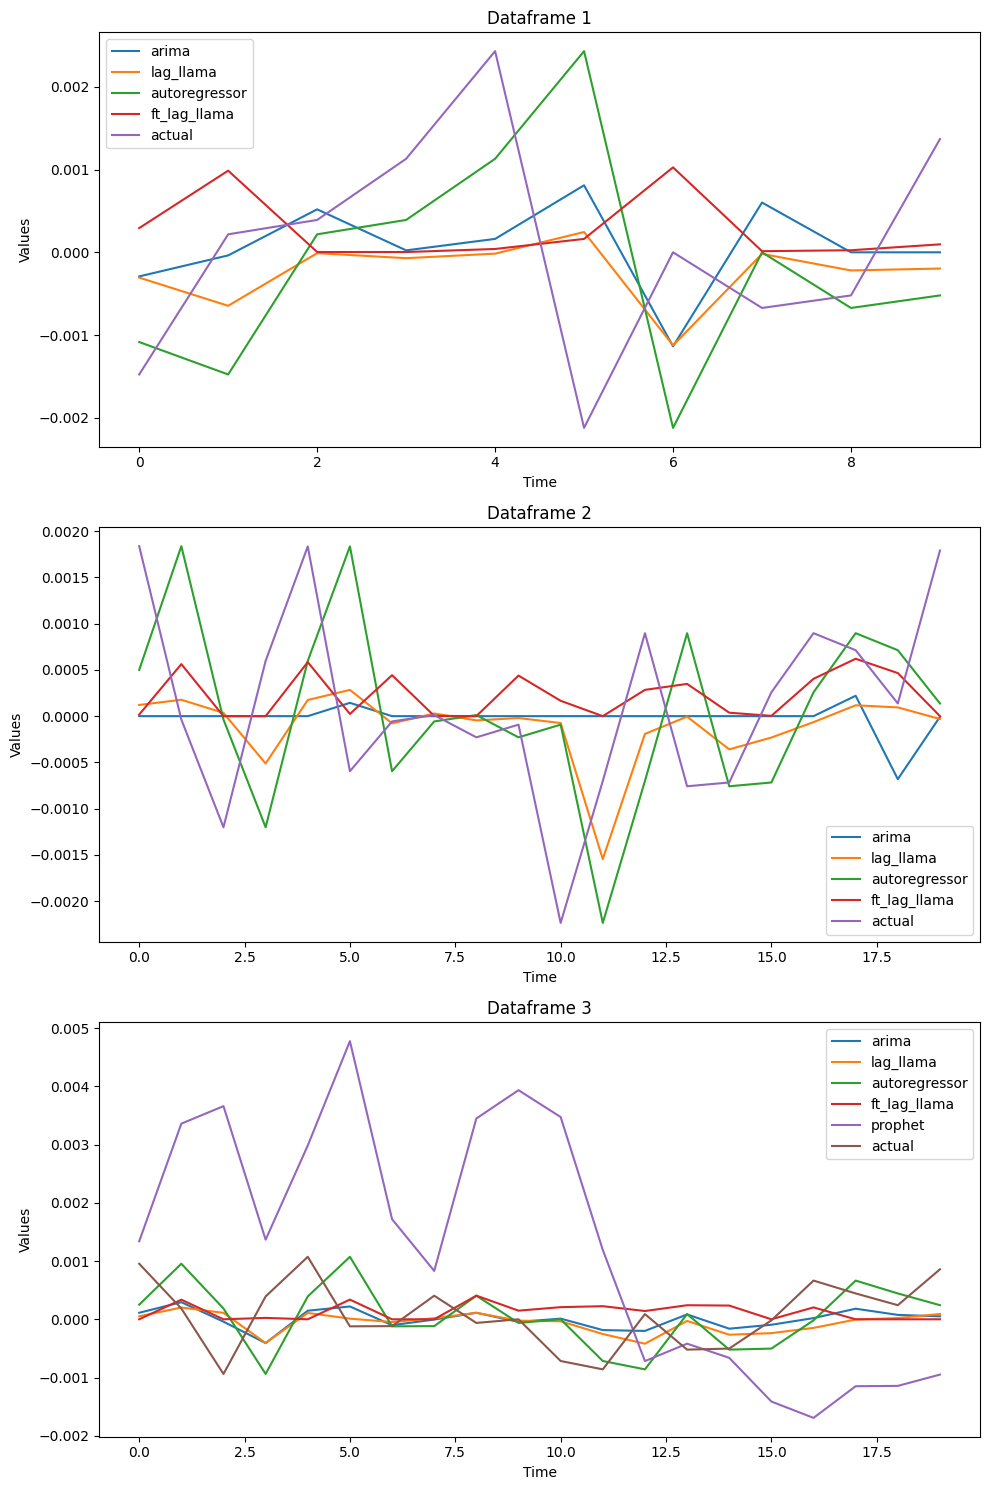

In [36]:
import matplotlib.pyplot as plt

# Assuming `prediction` is your list of dataframes
def plot_dataframes(prediction):
    num_plots = len(prediction)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

    # Check if there's only one dataframe to handle the axes object properly
    if num_plots == 1:
        axes = [axes]

    for i, df in enumerate(prediction):
        ax = axes[i]
        df.plot(ax=ax)
        ax.set_title(f'Dataframe {i+1}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Values')

    plt.tight_layout()
    plt.show()

# Example usage with your `prediction` list
plot_dataframes(prediction)

In [167]:
prediction2 = prediction[1]
prediction2.reset_index(inplace=True)

In [ ]:
import yfinance as yf
data = yf.download('AAPL', start='2024-07-27 15:29:00', end='2024-07-27 14:40:00', interval='1m')


    
# Filter the data to the specified timeframe
#data_filtered = data.between_time('15:30', '15:39')

# Calculate the minute returns
data['Returns'] = data['Close'].pct_change()

# Drop the first NaN return value
returns = data['Returns'].dropna()

# Convert the returns to a list
returns_list = returns.tolist()

In [175]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


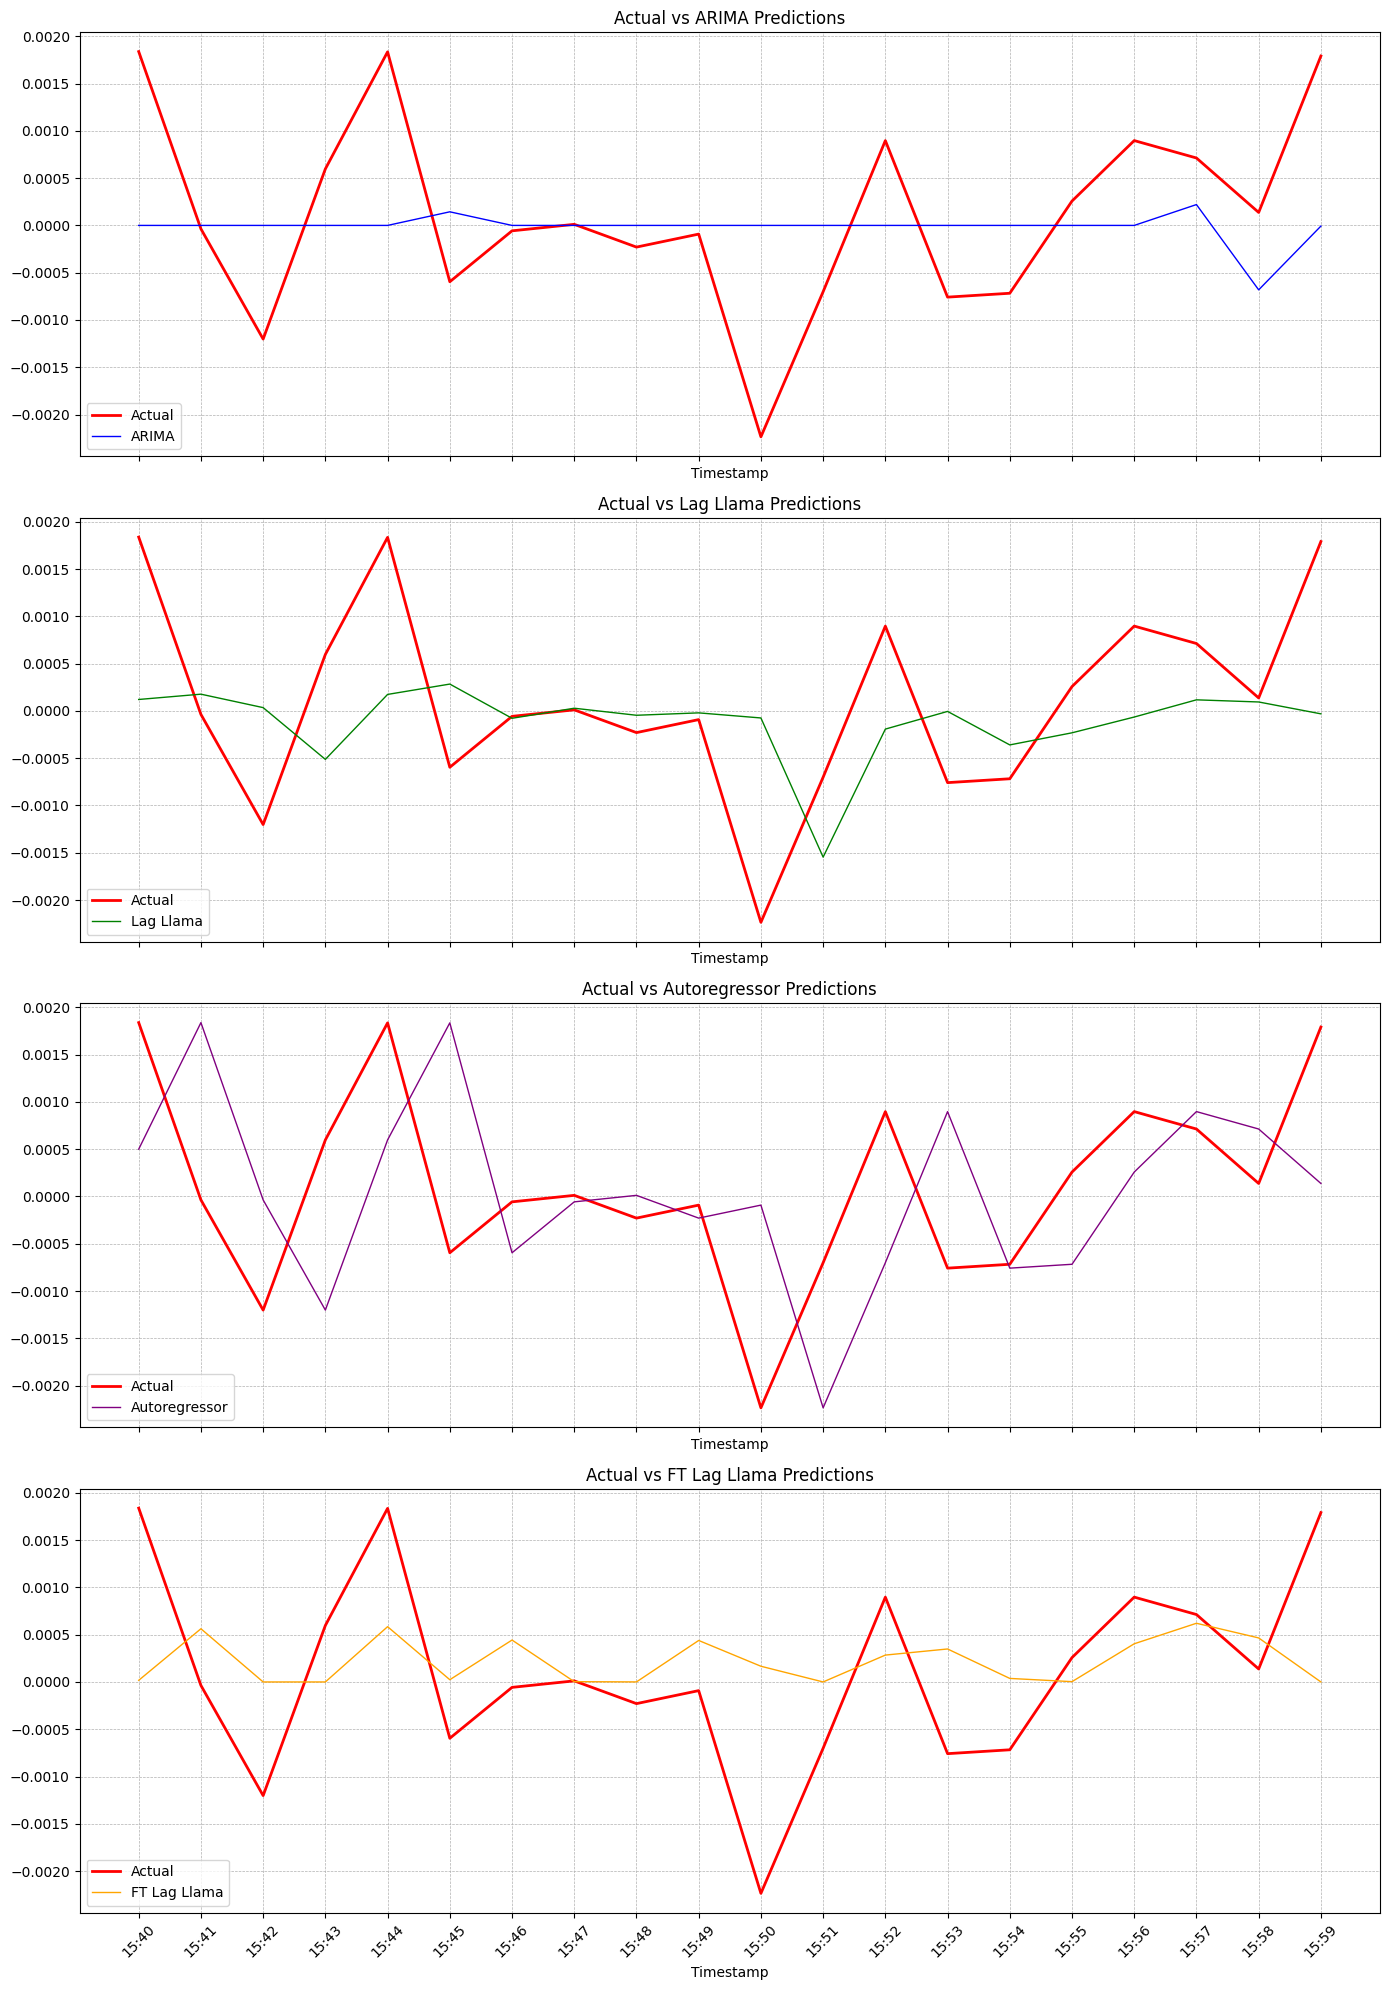

In [37]:
# Convert the 'timestamp' column to datetime
prediction2['timestamp'] = pd.to_datetime(prediction2['timestamp'])

# Simulate appending 20 data points prior to the first prediction

"""additional_data = {
    "arima": [None] * 10,
    "lag_llama": [None] * 10,
    "autoregressor": [None] * 10,
    "timestamp": pd.date_range(end=prediction2['timestamp'].iloc[0], periods=10, freq='T'),
    "ft_lag_llama": [None] * 10,
    "actual": [0] * 10  # Assuming actual values for these points
}

additional_df = pd.DataFrame(additional_data)

# Concatenate additional data to the original DataFrame
prediction2 = pd.concat([additional_df, prediction2]).reset_index(drop=True)"""

# Set the timestamp column as the index
prediction2.set_index('timestamp', inplace=True)

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Plot actual values and ARIMA predictions
axs[0].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[0].plot(prediction2.index, prediction2['arima'], color='blue', linestyle='-', linewidth=1, label='ARIMA')
axs[0].set_title('Actual vs ARIMA Predictions')
axs[0].legend()
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and Lag Llama predictions
axs[1].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[1].plot(prediction2.index, prediction2['lag_llama'], color='green', linestyle='-', linewidth=1, label='Lag Llama')
axs[1].set_title('Actual vs Lag Llama Predictions')
axs[1].legend()
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and Autoregressor predictions
axs[2].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[2].plot(prediction2.index, prediction2['autoregressor'], color='purple', linestyle='-', linewidth=1, label='Autoregressor')
axs[2].set_title('Actual vs Autoregressor Predictions')
axs[2].legend()
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot actual values and FT Lag Llama predictions
axs[3].plot(prediction2.index, prediction2['actual'], color='red', linewidth=2, label='Actual')
axs[3].plot(prediction2.index, prediction2['ft_lag_llama'], color='orange', linestyle='-', linewidth=1, label='FT Lag Llama')
axs[3].set_title('Actual vs FT Lag Llama Predictions')
axs[3].legend()
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# Set the x-axis labels and format
for ax in axs:
    ax.set_xlabel('Timestamp')
    xticks = prediction2.index.to_list()
    ax.set_xticks(xticks)
    ax.set_xticklabels([x.strftime('%H:%M') for x in xticks], rotation=45)

plt.tight_layout()

# Display the plot
plt.show()
